Prima parte della tesi.
Studio dei vari algoritmi di feature extraction.
Vengono analizzati i comportamenti dei vari algoritmi in funzioni di diverse immagini di input.

Analizzeremo

SIFT,BRIEF,ORB, SURF


Inizio esperimento

<h1>Risize</h1>

<h3> Caricamento immagine </h3>

In [1]:
def rate(k1,k2,matches):
    num = (kp1+kp2)/2
    rate = (matches/num)
    return rate

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
%matplotlib inline
from code import *

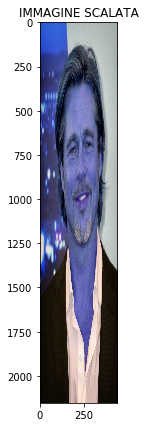

In [13]:



# Load the image
img = cv2.imread('./face1.jpg')

 
width = 440
height = img.shape[0] # keep original height
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
plt.title("IMMAGINE SCALATA")
plt.imshow(resized)
# Convert the training image to RGB
training_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(resized)





<h2>Esecuzione algoritmi</h2>

Risultati algoritmo sift:

Number of Keypoints Detected In The Training Image:  1429
Number of Keypoints Detected In The Query Image:  212


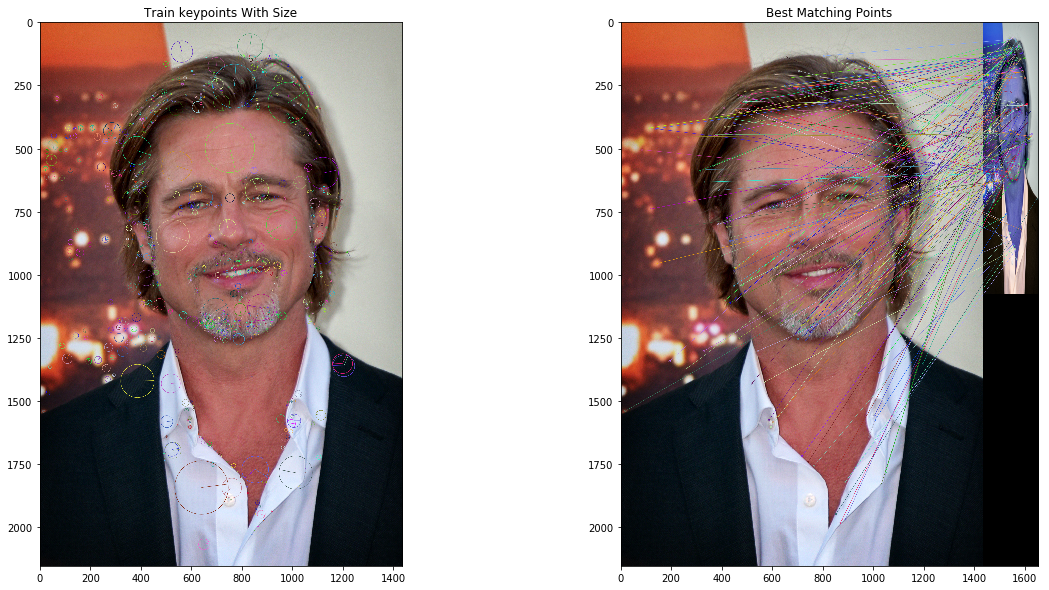


Number of Matching Keypoints Between The Training and Query Images:  185
Fine esecuzione sift.
 
Esecuzione svolta in: 6.63 secondi
Risultati algoritmo orb:

Numero di feature, immagine ORIGINALE:  500
Numero di feature, immagine TEST 446


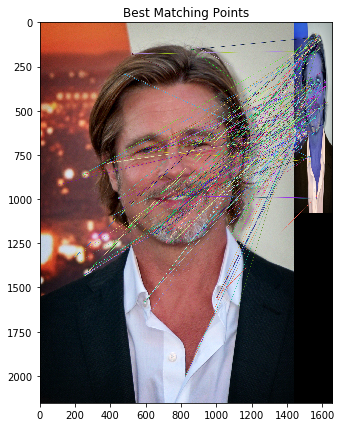


Number of Matching Keypoints Between The Training and Query Images:  209
Fine esecuzione orb.
 
Esecuzione svolta in: 1.55 secondi
Risultati algoritmo brief:

Number of Keypoints Detected In The Training Image:  5439
Number of Keypoints Detected In The Query Image:  701


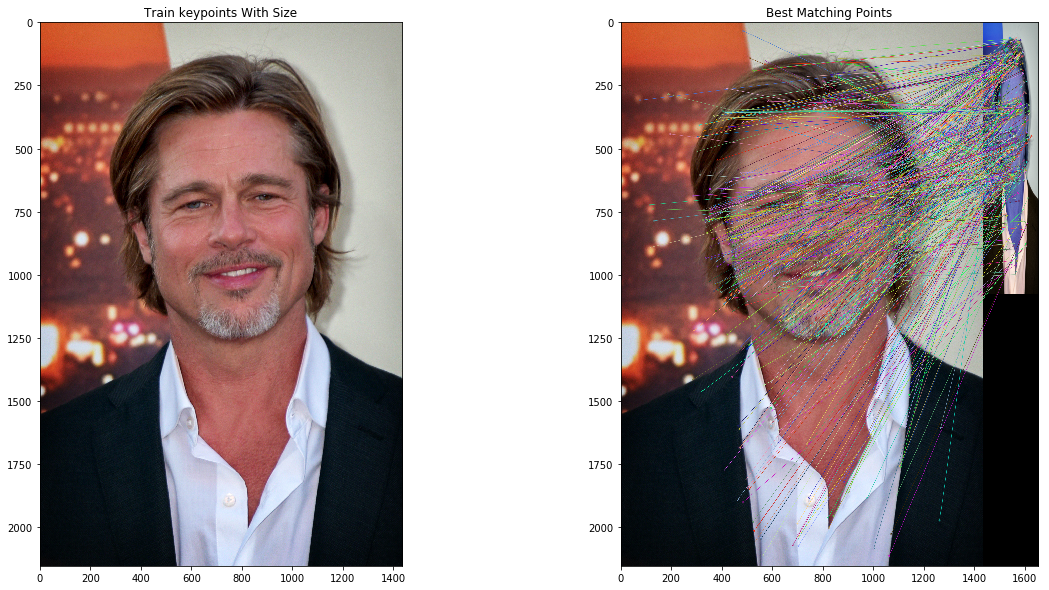


Number of Matching Keypoints Between The Training and Query Images:  529
Fine esecuzione brief.
 
Esecuzione svolta in: 3.82 secondi
Risultati algoritmo surf:

Number of Keypoints Detected In The Training Image:  628
Number of Keypoints Detected In The Query Image:  255

Number of Matching Keypoints Between The Training and Query Images:  137


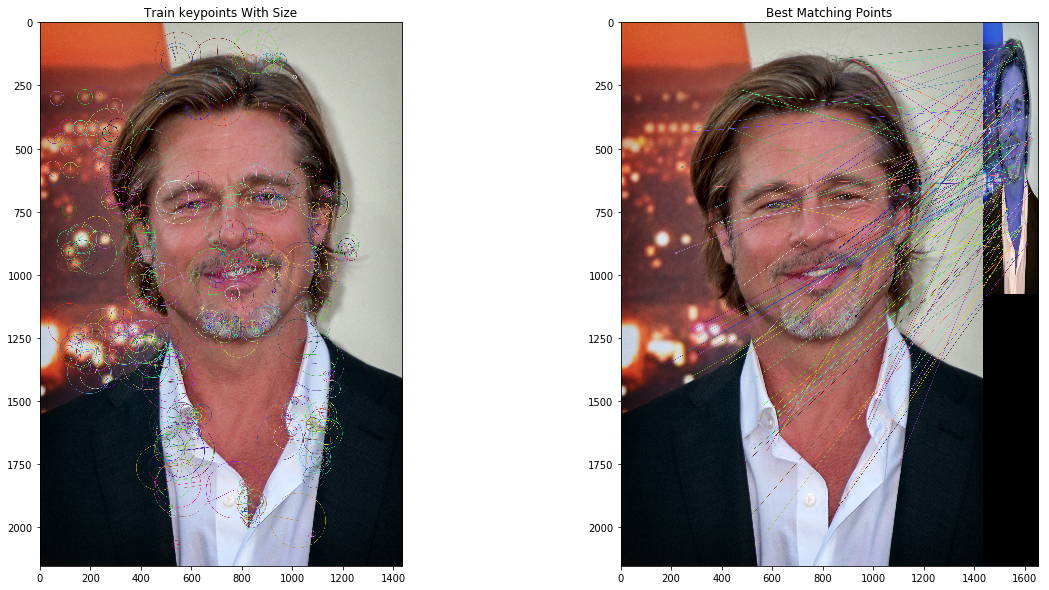

Fine esecuzione surf.
 
Esecuzione svolta in: 5.92 secondi


In [14]:





print("Risultati algoritmo sift:\n")
tempo_esecuzione_sift = 0
t1 = time()
kp1,kp2,matches_sift =sift(training_gray,training_image,test_image)
t2 = time()
tempo_esecuzione = t2 -t1
tempo_esecuzione= round(tempo_esecuzione, 2)
num = (kp1+kp2)/2
rate_sift = (matches_sift/num)
print("Fine esecuzione sift.\n \nEsecuzione svolta in:",tempo_esecuzione,"secondi")

print("Risultati algoritmo orb:\n")
tempo_esecuzione_orb = 0
t1 = time()
kp1_o,kp2_o,matches_orb =orb(training_gray,training_image,test_image)
t2 = time()
tempo_esecuzione_orb = t2 -t1
tempo_esecuzione_orb= round(tempo_esecuzione_orb, 2)
num = (kp1_o+kp2_o)/2
rate_orb = (matches_orb/num)
print("Fine esecuzione orb.\n \nEsecuzione svolta in:",tempo_esecuzione_orb,"secondi")

print("Risultati algoritmo brief:\n")
tempo_esecuzione_brief = 0
t1 = time()
kp1_b,kp2_b,matches_brief =brief(training_gray,training_image,test_image)
t2 = time()
num = (kp1_b+kp2_b)/2
rate_brief = (matches_brief/num)
tempo_esecuzione_brief = t2 -t1
tempo_esecuzione_brief= round(tempo_esecuzione_brief, 2)
print("Fine esecuzione brief.\n \nEsecuzione svolta in:",tempo_esecuzione_brief,"secondi")



print("Risultati algoritmo surf:\n")
tempo_esecuzione_surf = 0
t1 = time()
kp1_s,kp2_s,matches_surf =surf(training_gray,training_image,test_image)
t2 = time()

tempo_esecuzione_surf = t2 -t1
tempo_esecuzione_surf= round(tempo_esecuzione_surf, 2)
num = (kp1_s+kp2_s)/2
rate_surf = (matches_surf/num)
print("Fine esecuzione surf.\n \nEsecuzione svolta in:",tempo_esecuzione_surf,"secondi")



<h1> Considerazioni e analisi dei risultati delle esecuzioni </h1>

In [15]:
d = {'TIME' : [tempo_esecuzione,tempo_esecuzione_orb,tempo_esecuzione_brief,tempo_esecuzione_surf], 'KP1' : [kp1,kp1_o,kp1_b,kp1_s], 'KP2' : [kp2,kp2_o,kp2_b,kp2_s], 'Matches' : [matches_sift,matches_orb,matches_brief,matches_surf], 'MATCHES RATE' : [rate_sift,rate_orb,rate_brief,rate_surf]}
df = pd.DataFrame(d, index=['SIFT','ORB','BRIEF','SURF'])
df

TIME   KP1  KP2  Matches  MATCHES RATE
SIFT   6.63  1429  212      185      0.225472
ORB    1.55   500  446      209      0.441860
BRIEF  3.82  5439  701      529      0.172313
SURF   5.92   628  255      137      0.310306

<h1> Dichiarazione algoritmi </h1>

In [4]:
def sift(training_gray,training_image,test_gray):
    sift = cv2.xfeatures2d.SIFT_create()

    train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(20,10))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
    kp1 = len(train_keypoints)

    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
    kp2 = len(test_keypoints)

    # Create a Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

    # Perform the matching between the SIFT descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)

    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    # Display the best matching points
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points')
    plt.imshow(result)
    plt.show()
    matche = len(matches)
    
    # Print total number of matching points between the training and query images
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    return kp1,kp2,matche

In [5]:
def orb(training_gray,training_image,test_gray):
    orb = cv2.ORB_create()

    train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)


    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    ############################################
    #for marker in train_keypoints:
     #   img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    #plt.imshow(img2),plt.title("Original Image"), plt.show()

    #for marker in test_keypoints:
     #   img3 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    #plt.imshow(img3),plt.title("Test Image"), plt.show()
    ###########################################

    kp1 = len(train_keypoints)
    print("Numero di feature, immagine ORIGINALE: ",kp1)
    
    # Print the number of keypoints detected in the query image
    kp2 = len(test_keypoints)
    print("Numero di feature, immagine TEST", kp2)


    # Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    #TROVIAMO LE CORRISPONDENZE TRA IL TEST E TRAINING IMAGE
    matches = bf.match(train_descriptor, test_descriptor)


    matches = sorted(matches, key = lambda x : x.distance)
    matche = len(matches)
    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points')
    plt.imshow(result)
    plt.show()
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    return kp1,kp2,matche


    

In [6]:
def brief(training_gray,training_image,test_gray):

    fast = cv2.FastFeatureDetector_create() 
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    train_keypoints = fast.detect(training_gray, None)
    test_keypoints = fast.detect(test_gray, None)

    train_keypoints, train_descriptor = brief.compute(training_gray, train_keypoints)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    #cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    #cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(20,10))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    kp1 = len(train_keypoints)
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
    kp2 = len(test_keypoints)
    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

    # Create a Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the BRIEF descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)

    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    # Display the best matching points
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points')
    plt.imshow(result)
    plt.show()
    matche = len(matches)
    # Print total number of matching points between the training and query images
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    return kp1,kp2,matche

In [7]:
def surf(training_gray,training_image,test_gray):

    surf = cv2.xfeatures2d.SURF_create(800)

    train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(20,10))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))


    # ## Matching Keypoints

    # Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

    matches = bf.match(train_descriptor, test_descriptor)

    matches = sorted(matches, key = lambda x : x.distance)

    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    kp1 = len(train_keypoints)
    kp2 = len(test_keypoints)
    matche = len(matches)
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points')
    plt.imshow(result)
    plt.show()
    return kp1,kp2,matche
    